# Test reading from GSF file

In [5]:
import numpy as np
import pySNOM
from pySNOM import readers, images
import os

fdata = 'datasets/testPsHet O3A raw.gsf'
finfo = 'datasets/testinfofile.txt'
data_reader = readers.GsfReader(os.path.join(pySNOM.__path__[0], fdata))
gsfimage = data_reader.read()
info_reader = readers.NeaInfoReader(os.path.join(pySNOM.__path__[0], finfo))
infodict = info_reader.read()

channel_name = 'O3A raw'
phaseimage = images.GwyImage(gsfimage,filename=fdata,info=infodict)
phaseimage.channel = channel_name
# phaseimage.mode = pySNOM.defaults.image_mode_defs["2D (PsHet)"]

print(f' Measurement mode: {phaseimage.mode}\n Channel: {phaseimage.channel}\n Data type: {phaseimage.datatype}\n Demod order: {phaseimage.order}')
print(f'X resolution: {phaseimage.xres}')
print(f'Data size: {np.shape(phaseimage.data)}')

 Measurement mode: MeasurementModes.PsHet
 Channel: O3A raw
 Data type: DataTypes.Amplitude
 Demod order: 3
X resolution: 200
Data size: (200, 200)


# Test the image proccesing

[]

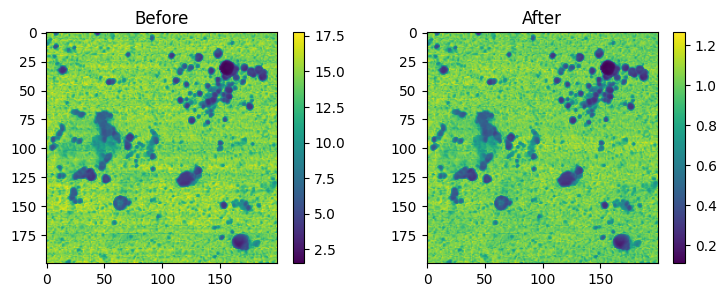

In [9]:
import matplotlib.pyplot as plt
# Plotting the BEFORE
px = 1/plt.rcParams['figure.dpi']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(900*px, 300*px))
im1 = ax1.imshow(phaseimage.data)
ax1.set_title('Before')
fig.colorbar(im1,ax=ax1)

# Processing

transformer = images.LineLevel(method="median", datatype=phaseimage.datatype)
d = transformer.transform(phaseimage.data)

# Plotting the AFTER
im2= ax2.imshow(d)
ax2.set_title('After')
fig.colorbar(im2,ax=ax2)

plt.plot()
